# Number 5

5.	Anda diberikan sebuah dataset tentang data kualitas WINE yang dapat diambil dari link https://drive.google.com/file/d/1GOnJQlebkwbFuoZ0CGeX8-biQDFkA2We/view?usp=drive_link . Dari dataset ini ingin diketahui ada pola atau informasi apa yang tersimpan. 
a. [10] Silakan anda terapkan model yang paling sesuai untuk mendapatkan pola informasi yang tersimpan dan tunjukkan hasilnya 
b. [15] dari pola yang didapat, silakan ada evaluasi modelnya. Gunakan metrik yang tepat. Gunakan Python untuk implementasi metodenya. Berikan script code dan screenshotnya 

Actually, I know nothing about wine stuff, but let's try it anyway. Since I don't know what is it data about, I will do some procedure below:

### 5-1 Information Extraction
1. Information research
2. Data Exploration
3. Getting data correlation among the features into the label

### 5-2 Model Tuning
1. Train-Test-Val Split
2. Employing Artificial Neural Network (ANN) to build a prediction model

## 5-1 Information Extraction

### 1. Information research
The report of this information research, will be available at my report book in which I don't include here.

### 2. Data Exploration

The data exploration technique employs pandas data analysis tool.

In [31]:
# Importing things
import pandas;
import seaborn;

In [32]:
dataframe = pandas.read_csv("wine.csv");
dataframe.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
# Getting the shape of the data. Denoted with (total rows, total columns)
dataframe.shape

(178, 14)

In [34]:
# Check for any null data
dataframe.loc[:, dataframe.isnull().any()]

""
0
1
2
3
4
...
173
174
175
176


### 3. Getting data correlaton among features and labels

This part will check the correlation for each the features and the label within the dataset. 
This part employs the pandas `corr` function.

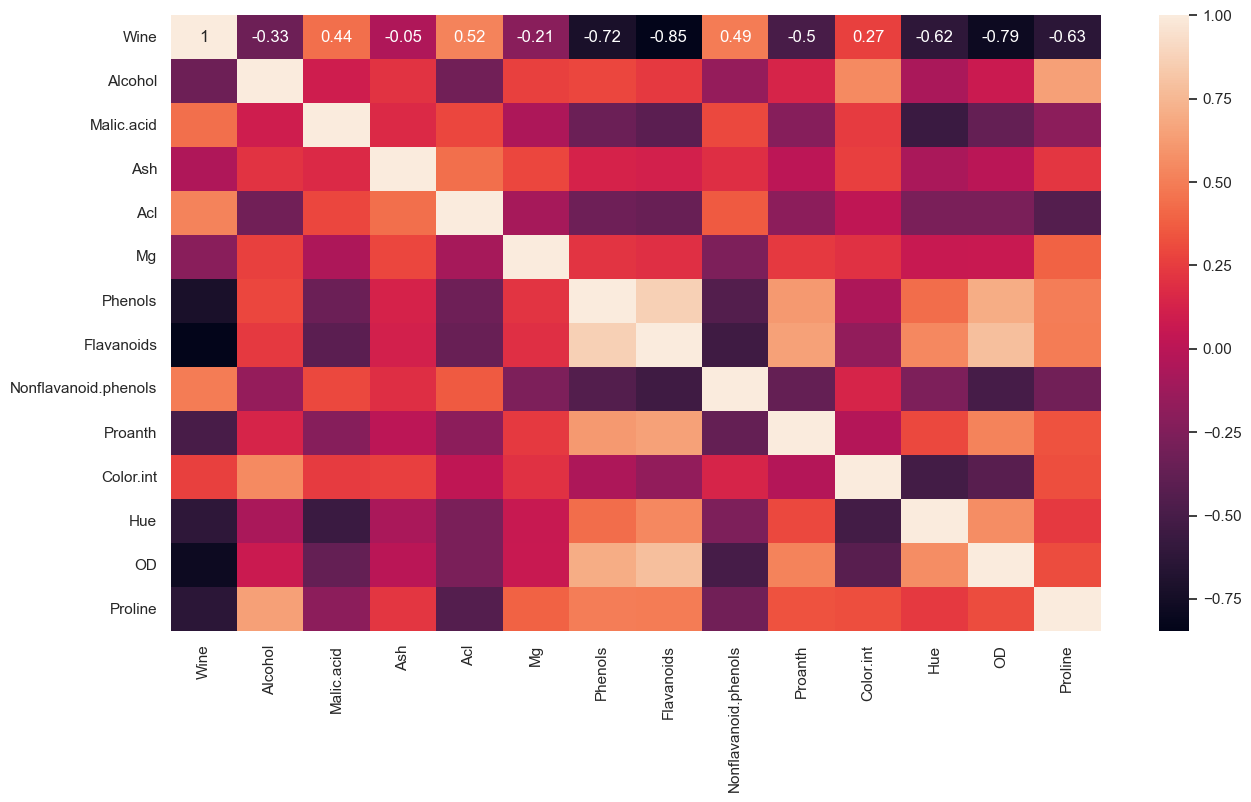

In [35]:
correlation = dataframe.corr();

seaborn.set(rc={"figure.figsize": (15, 8)})
seaborn.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True);

## 5-2 Defining Predictive Model

In [36]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt;
import time;

from sklearn.metrics import roc_auc_score, accuracy_score;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.utils import plot_model;
from tensorflow.keras.optimizers import Adam;
from tensorflow.keras.regularizers import L1L2; 
from tensorflow.keras.callbacks import EarlyStopping;
from tensorflow.keras.metrics import AUC;

### 1. Data Pre-Processing
The intention of data pre-processing for ANN as below: 
- The label is multiclass categorical
By choosing the "Wine" feature as the label, means that I need to do Hot-Top Encoding where instead of predicting the exact value (1, 2, or 3), the prediction goes tabular. This is mandatory for classification task, especially when employing categorical cross entropy. This is what will be happen with the value after doing Hot-Top Encoding:

| Wine | Wine_1 | Wine_2 | Wine_3 |
|---|---|---|---|
| 1 | 1 | 0 | 0 |
| 2 | 0 | 1 | 0 |
| 3 | 0 | 0 | 3 |

Instead of using "Wine" earlier, the one that being choosed as the predictor is the generated Wine_1, Wine_2, Wine_3 tabular columns. Making the dimension of the data is `(3, None)`. 

- Dimensional Reducement
With the data correlation findings conducted, we define some kind of treshold, to eliminate the not strong bond with the label. In this case, the treshold set to 0.5 or more for positive correlation, and -0.5 or less for negative correlation. In which, the dropped columns are as follows:

| No | Feature | Correlation (feature -> Wine) |
|---|---|---|
| 1 | Wine | 1.0 (Of course we dropped this from feature since this is the label itself.) |
| 2 | Alcohol | -0.33 |
| 3 | Malic.acid | 0.44 |
| 4 | Mg | -0.21 |
| 5 | Nonflavanoid.phenols | 0.49 |
| 6 | Color.int | 0.27 |
| 7 | Ash | -0.05 |

- Normalize the feature  
Basically what I do to the feature is to make every single features columns are standardized, by lowering the standard deviation, and make the value mean of 0. This will ease the model training phase. 

In [37]:
dropped_features = [
    "Wine", # Ofc. It is treated as labels.
    "Alcohol",
    "Malic.acid",
    "Ash",
    "Mg",
    "Nonflavanoid.phenols",
    "Color.int"
]

# Define features
features = dataframe.drop(columns = dropped_features, axis = 1);

# Normalize the data within each features wityh 
scaler = StandardScaler();
features = pandas.DataFrame(scaler.fit_transform(features), columns = features.columns, index = dataframe.index);

label = pandas.get_dummies(dataframe["Wine"], prefix = "label");

### 1. Train-Test-Val Splits

Split the data into this ratio below:

| Split | Ratio |
|---|---|
| Train | 60% |
| Test | 20% |
| Val | 20% |

In [38]:
# 60 : 40
feature_train, feature_test, label_train, label_test = train_test_split(
    features, 
    label,
    train_size = 0.6,
    test_size = 0.4,
    random_state = 42
);

# From 40 of 100, each 50% of 40 is 20. So its 20:20
feature_test, feature_val, label_test, label_val = train_test_split(
    feature_test,
    label_test,
    train_size = 0.5,
    test_size = 0.5,
    random_state = 42
);

print(feature_train.shape, feature_test.shape, feature_val.shape)

(106, 7) (36, 7) (36, 7)


### 2. Model Architecture

In [39]:
"""
ANNModel

This class implements a OO-pattern to ease model generation. 
"""
class ANNModel:

    def __init__(self):
        # The constructor only allowed to construct a standardized unchangeable configuration.
        model = Sequential();
        
        # Hidden Layer

        for i in [self.hidden_layer()]:
            for j in i:
                model.add(j);

        # Output Layer
        model.add(Dense(3, activation = "softmax", kernel_initializer = "he_normal"));
    
        self.model = model;

    def hidden_layer(self):
        return [
            Dense(16, activation = "relu", kernel_initializer = "he_normal", input_shape = (7,), kernel_regularizer = L1L2(1e-2)),
            Dropout(0.5),
            Dense(8, activation = "relu", kernel_initializer = "he_normal", kernel_regularizer = L1L2(1e-2)),
        ];

    # Early stopping after loss are not improved for some epochs
    def _callback_early_stopping(self):
        return EarlyStopping(
            monitor = "val_loss",
            patience = int(5e+1),
            restore_best_weights = True,
        );

    def fitting(self, train_feature, train_label, test_feature, test_label):
        
        model = self.model;

        plot_model(model, to_file = ("model_architecture.png"), show_shapes = True);

        model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]);

        # Fitting
        model_plot = model.fit(
            train_feature, 
            train_label, 
            epochs = int(1e+3), 
            validation_data = (test_feature, test_label), 
            verbose = 0,
            callbacks = [self._callback_early_stopping()],
        );

        plt.plot(model_plot.history["loss"], label = "Model Training Loss");
        plt.plot(model_plot.history["val_loss"], label = "Model Validation Loss");
        plt.title("Training and Validation Loss");
        plt.xlabel("Epochs");
        plt.ylabel("Loss");
        plt.legend();
        plt.show();

        epoch = len(model_plot.history["loss"]);
        print(f"Fixed Epoch: {epoch}");

        return model;

print("Applied new model architecture at ", time.strftime("%Y-%m-%d %H:%M:%S"))

Applied new model architecture at  2024-02-19 02:20:26


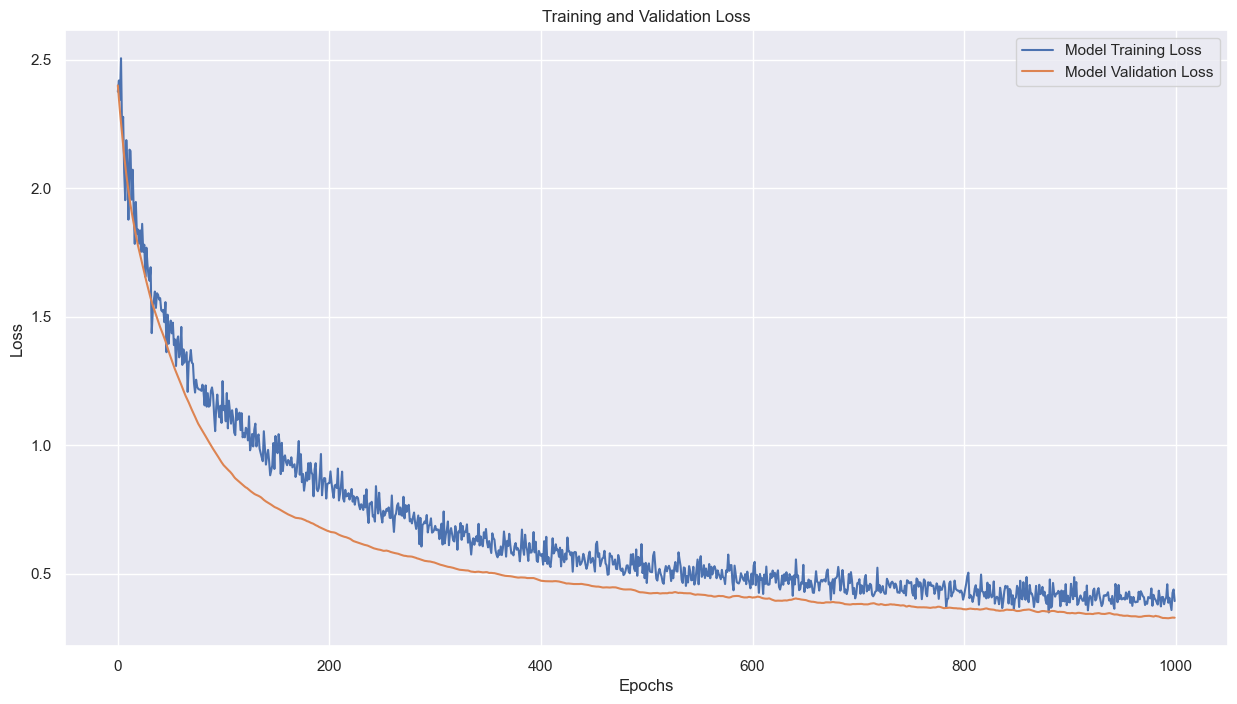

Fixed Epoch: 1000
2/2 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.9167


In [43]:
model = ANNModel();
dojo = model.fitting(feature_train, label_train, feature_val, label_val);
loss, accuracy = dojo.evaluate(feature_test, label_test);